In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("dark_background")

Preliminary measurements: Aluminum box #2

Internal resistance R_0 = -815.3423219863286
Internal voltage V_0= 8.679747391582353
I = [0.0066     0.00478    0.00374667 0.003085   0.00262    0.00227333]


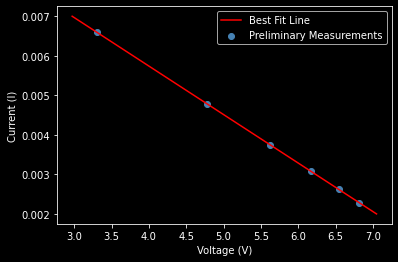

In [2]:
R_L = np.array([500,1000,1500,2000,2500,3000]) #load resistance in ohms
V = np.array([3.3,4.78,5.62,6.17,6.55,6.82]) #output voltage in volts
I = V / R_L

m,b = np.polyfit(I, V, 1) #fit a straight line to I vs V graph
R_0 = m
V_0 = b
print("Internal resistance R_0 =",R_0)
print("Internal voltage V_0=",V_0)

plt.scatter(V, I, c="steelblue", label="Preliminary Measurements")
plt.ylabel("Current (I)")
plt.xlabel("Voltage (V)")
x = np.linspace(0.002, 0.007, 100)
y = R_0*x + V_0
plt.plot(y, x, c="r", label="Best Fit Line")
plt.legend()
#plt.savefig("Preliminary Measurements")
print("I =", I)

Standard Deviation of Current = 6.5742788656725685e-06
Chi squared = 7.665926766947413e-08


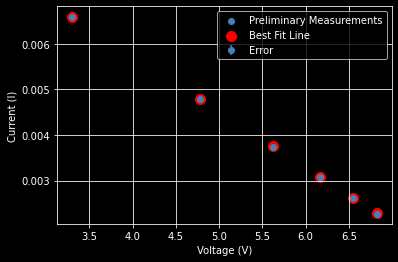

In [3]:
#Preliminary Measurements Stats and Error
I_comp = (V-V_0)/R_0 #Value of I from the best fit line
sig_I = np.sqrt((np.sum((I-I_comp)**2)) / (len(I)-1))
chi_sq_prelim = stats.chisquare(I, I_comp)
print("Standard Deviation of Current =",sig_I)
print("Chi squared =",chi_sq_prelim[0])

plt.scatter(V, I, c="steelblue", label="Preliminary Measurements")
plt.ylabel("Current (I)")
plt.xlabel("Voltage (V)")
plt.errorbar(V, I, yerr=sig_I, fmt='o', c='steelblue', label="Error")
plt.scatter(V, I_comp, c="r", s=100, label="Best Fit Line")
plt.grid()
plt.legend()
#plt.savefig("Preliminary with error")

## 6.8: Linear Elements

# Box B

Magnitude of Impedance = [ 57.17868339  56.17554859  56.70886076  57.24050633  60.48427673
  71.04477612 139.57894737 220.52505967 309.15492958 469.82758621
 172.52475248 121.2565445   63.         274.375       57.41772152
  90.         100.27100271 244.00954654 369.10344828 411.00917431]
Real component of Impedance = [ -57.1699748   -55.96178367  -56.57072082  -56.37089442  -55.25513627
  -57.47643124  -58.98861211  -68.14599112  -64.27692413 -113.66158026
  -59.00694057  -60.62827225  -54.00153994  -57.04577017  -54.6074982
  -59.04531261  -60.34459582  -63.15431783  -64.09414116  -64.29600031]
Imaginary component of Impedance = [  0.99790562   4.89602166   3.95581016   9.93970961  24.60117168
  41.75907166 126.50148691 209.731795   302.39915262 455.87169898
 162.1202368  105.01124791  32.44739872 268.37924795  17.74305173
  67.92386222  80.07998339 235.69512286 363.49593753 405.94896935]
Measurement Number 20
Y Intercept =  4.760752385609083e-05
Slope =  2387.9950013446537


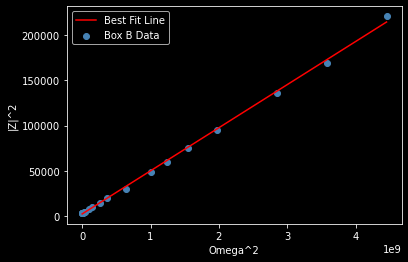

In [4]:
#black box B: resistor R and inductor L in parallel
R_L_B = np.array([57,56,56,56,59,70,130,220,300,500,170,120,60,
                260,56,90,100,240,360,400]) #load resistance (ohms)
f_B = np.array([11.2,50.35,102.8,200.0,500.5,1014,3007,5040,7060,10620,
              4030,2543,711,6270,359,1630,1943,5600,8500,9530]) #frequency (Hz)

A_1_B = np.array([6.4,6.4,6.4,6.46,6.52,6.8,8.16,8.4,8.78,8.72,8.2,7.72,
                6.72,8.78,6.48,7.12,7.4,8.52,8.92,8.96]) #peak to peak ch. 1 (V)
A_2_B = np.array([6.38,6.38,6.32,6.32,6.36,6.7,7.60,8.38,8.52,9.28,8.08,7.64,
                6.40,8.32,6.32,7.12,7.38,8.38,8.7,8.72]) #peak to peak ch.2 (V)
phi_deg_B = np.array([179,175,176,170,156,144,115,108,102,104,110,120,
                    149,102,162,131,127,105,100,99]) #phase angle (measured in degrees)

phi_B = np.radians(phi_deg_B)
omega_B = f_B * 2*np.pi
V_1_B = A_1_B/2 
V_2_B = A_2_B/2
Z_B = abs((R_L_B*V_1_B)/V_2_B)
i=1j
Z_c_B = Z_B*np.cos(phi_B) + i*Z_B*np.sin(phi_B)
Y_B = 1/Z_B
print("Magnitude of Impedance =",Z_B)
print("Real component of Impedance =",Z_c_B.real)
print("Imaginary component of Impedance =",Z_c_B.imag)

if len(R_L_B) == len(f_B) == len(A_1_B) == len(A_2_B) == len(phi_deg_B):
    print("Measurement Number",len(R_L_B))
else:
    print("ERROR!!!")

plt.scatter(omega_B**2,Z_B**2, c="steelblue",label="Box B Data")
plt.xlabel("Omega^2")
plt.ylabel("|Z|^2")
m_B,b_B = np.polyfit(omega_B**2,Z_B**2,1)
X_B = np.linspace(0,max(omega_B**2),100)
plt.plot(X_B, m_B * X_B + b_B ,c='r',label="Best Fit Line")
plt.legend()
print("Y Intercept = ",m_B)
print("Slope = ",b_B)
#plt.savefig("Box B linear")

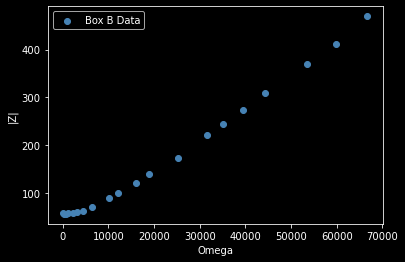

In [5]:
#omega vs. Z graph
plt.scatter(omega_B, Z_B, c="steelblue", label="Box B Data")
plt.xlabel("Omega")
plt.ylabel("|Z|")
plt.legend()
#plt.savefig("Box B omega vs Z")

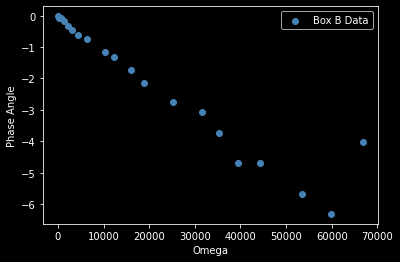

In [6]:
#omega vs. phase graph
plt.scatter(omega_B, np.tan(phi_B), c="steelblue", label="Box B Data")
plt.xlabel("Omega")
plt.ylabel("Phase Angle")
plt.legend()
#plt.savefig("Box B omega vs tan(phi)")

Standard Deviation of Impedance^2 = 2100.2614520058173
Standard Deviation of Impedance = 45.8286095360291
Chi squared = 2578.699176907891


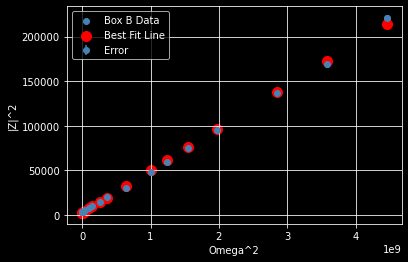

In [7]:
#box B stats
Z_B_comp = m_B * omega_B**2 + b_B #values of best fit line computed at values of omega^2, 
#essentially the values of xbar to be used in standard deviation and chi sqaured test

sig_Z_B_squared = np.sqrt((np.sum((Z_B**2 - Z_B_comp)**2)) / (len(Z_B_comp)-1))
chi_sq_B = np.sum(((Z_B**2 - Z_B_comp)**2) / Z_B_comp)

plt.scatter(omega_B**2,Z_B**2, c="steelblue",label="Box B Data")
plt.scatter(omega_B**2, Z_B_comp, s=100, c='r',label="Best Fit Line")
plt.errorbar(omega_B**2, Z_B**2, yerr=sig_Z_B_squared,c="steelblue",fmt='o', label="Error")
print("Standard Deviation of Impedance^2 =",sig_Z_B_squared)
print("Standard Deviation of Impedance =",np.sqrt(sig_Z_B_squared))
print("Chi squared =", chi_sq_B)
plt.xlabel("Omega^2")
plt.ylabel("|Z|^2")
plt.legend()
plt.grid()
#plt.savefig("Box B with Error")

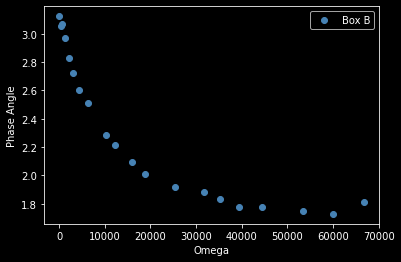

In [8]:
#omega vs phase angle
plt.plot(omega_B, phi_B, 'o', c="steelblue", label="Box B")
plt.xlabel("Omega")
plt.ylabel("Phase Angle")
plt.legend()
#plt.savefig("Box B omega vs phi")

# Box C

Number of Measurements = 28


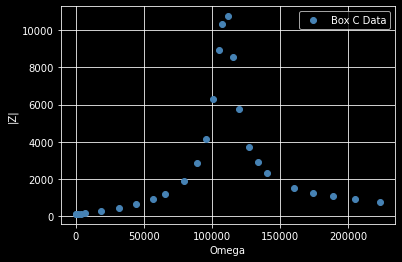

In [9]:
#black box C: (resistor R and inductor L in series) in parallel with a capacitor
R_L_C = np.array([100,100,100,100,100,140,300,300,600,900,3400,1500,1100,1100,4000,1000,
                2000,3000,3000,10000,6000,6000,2300,10000,10000,9000,770,900]) #load resistance (ohms)
f_C = np.array([10.7,50.10,100.8,300.1,603.1,1081,3001,5030,7092,9063,20240,25500,27740,
              30050,15230,10480,12700,21370,14140,17800,16100,19120,22320,18370,17140,
                16800,35600,32700]) #frequency (Hz)

A_1_C = np.array([6.8,6.80,6.80,6.84,7.04,6.64,7.20,9.52,8.72,8.80,8.48,8.96,9.44,8.84,8.24,9.44,
                8.4,8.2,8.16,6.8,7.76,7.36,8.64,6.38,6.82,7.0,9.08,9.08]) #peak to peak ch. 1 (V)
A_2_C = np.array([6.00,5.96,5.96,5.96,5.88,6.8,8.80,6.80,8.24,8.56,7.76,8.88,8.48,9.20,7.92,8.04,
                8.88,8.52,8.64,6.32,7.36,7.68,8.48,7.44,6.6,7.04,9.08,9.08]) #peak to peak ch.2 (V)
phi_deg_C = np.array([180,175,176,167,156,147,120,111,105,107,-112,-98,-99,-97,115,110,106,-107,
                    109,-169,125,-127,-104,-146,154,141,-97,-96]) #phase angle (measured in degrees)

phi_C = np.radians(phi_deg_C)
omega_C = f_C * 2*np.pi
V_1_C = A_1_C/2 
V_2_C = A_2_C/2
Z_C = abs((R_L_C*V_1_C)/V_2_C)
i=1j
Z_c_C = Z_C*np.cos(phi_C) + i*Z_C*np.sin(phi_C)
Y_C = 1/Z_C
#print("Magnitude of Impedance =",Z)
#print("Real component of Impedance =",Z_c.real)
#print("Imaginary component of Impedance =",Z_c.imag)

if len(R_L_C) == len(f_C) == len(A_1_C) == len(A_2_C) == len(phi_deg_C):
    print("Number of Measurements =",len(R_L_C))
else:
    print("ERROR!!!")

plt.plot(omega_C, Z_C,'o', c="steelblue", label="Box C Data")
plt.xlabel("Omega")
plt.ylabel("|Z|")
A,B = np.polyfit(omega_C, Z_C, 1)
X = np.linspace(0, max(omega_C), 100)
plt.grid()
plt.legend()
#plt.savefig("Box C omega vs Z")

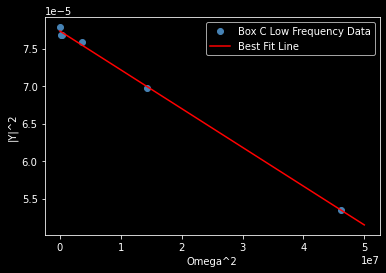

In [10]:
plt.plot((omega_C[omega_C<10000])**2, (1/Z_C[omega_C<10000])**2,'o',
         c='steelblue',label="Box C Low Frequency Data")
plt.xlabel("Omega^2")
plt.ylabel("|Y|^2")
a,b = np.polyfit((omega_C[omega_C<10000])**2, (1/Z_C[omega_C<10000])**2,1)
X1 = np.linspace(0,5e7,100)
plt.plot(X1,a*X1 + b,c='r',label="Best Fit Line")
plt.legend()
#plt.savefig("box C low frequency linear")

Standard Deviation of |Y|^2 = 3.6230082256413154e-07
Chi squared = 1.0280193946131053e-08


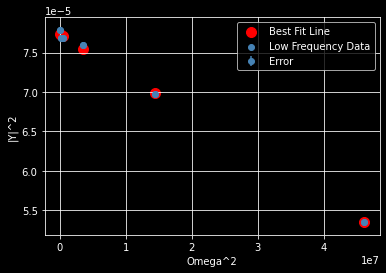

In [11]:
#Box C low frequency stats
Y_C = 1/Z_C
Y_C_squared_comp = a*((omega_C[omega_C<10000])**2) + b
sig_Y_C_squared = np.sqrt(np.sum(((Y_C[omega_C<10000])**2 - Y_C_squared_comp)**2) /
                          len(omega_C[omega_C<10000]))
chi_sq_C_low = np.sum((((Y_C[omega_C<10000])**2 - Y_C_squared_comp)**2) / Y_C_squared_comp)

plt.scatter(((omega_C[omega_C<10000])**2),Y_C_squared_comp, s=100, c='r',label="Best Fit Line")
plt.scatter((omega_C[omega_C<10000])**2, (Y_C[omega_C<10000])**2,
         c='steelblue',label="Low Frequency Data")
plt.xlabel("Omega^2")
plt.ylabel("|Y|^2")
print("Standard Deviation of |Y|^2 =",sig_Y_C_squared)
print("Chi squared =",chi_sq_C_low)
plt.errorbar((omega_C[omega_C<10000])**2, (Y_C[omega_C<10000])**2, 
             yerr=sig_Y_C_squared, fmt='o', c="steelblue", label="Error")
plt.legend()
plt.grid()
#plt.savefig("box C low frequency with error")

C =  5.0926373702093995e-17 D = -8.895883313675199e-07


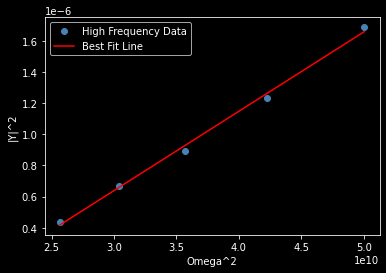

In [12]:
plt.plot((omega_C[omega_C>150000])**2,(1/Z_C[omega_C>150000])**2,'o',
         c='steelblue',label="High Frequency Data")
plt.xlabel("Omega^2")
plt.ylabel("|Y|^2")
C,D = np.polyfit((omega_C[omega_C>150000])**2,(1/Z_C[omega_C>150000])**2,1)
print("C = ",C,"D =",D)
X2 = np.linspace(min((omega_C[omega_C>150000])**2),max((omega_C[omega_C>150000])**2),100)
#X2 = np.linspace(2.5e10,5e10,100)
plt.plot(X2,C*X2 + D,c='r',label="Best Fit Line")
plt.legend()
#plt.savefig("box C high frequency linear")

Standard deviation of high frequency Y = 2.6650741894306993e-08
Chi squared = 3.0045414426038048e-09


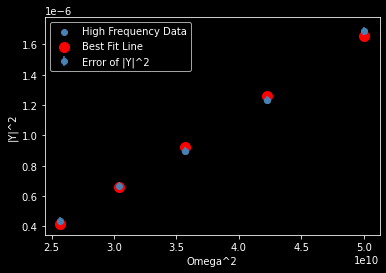

In [13]:
#Box C high frequency stats
high_omega_C = omega_C[omega_C>150000]
high_Y_C = 1/Z_C[omega_C>150000]
high_Y_C_squared_comp = C * high_omega_C**2 + D
sig_high_Y_C = (np.sqrt(np.sum((high_Y_C**2 - high_Y_C_squared_comp)**2) / (len(high_Y_C)-1)))
chi_sq_C_high = np.sum(((high_Y_C**2 - high_Y_C_squared_comp)**2) / high_Y_C_squared_comp)
                
plt.scatter(high_omega_C**2, high_Y_C**2, c="steelblue", label="High Frequency Data")                
plt.scatter(high_omega_C**2, high_Y_C_squared_comp, s=100, c='r', label="Best Fit Line")
plt.xlabel("Omega^2")
plt.ylabel("|Y|^2")
print("Standard deviation of high frequency Y =",sig_high_Y_C)
print("Chi squared =",chi_sq_C_high)
plt.errorbar(high_omega_C**2, high_Y_C**2, yerr=sig_high_Y_C, fmt='o',
             c="steelblue", label="Error of |Y|^2")
plt.legend()
#plt.savefig("box C high frequency with error")

# Box F

Magnitude of Impedance = [2227.84810127 2206.91823899 2200.         2200.         2186.25
 2165.83850932 2055.55555556 2122.18649518 2194.23076923 1837.7245509
 1627.90697674 1415.73033708 1320.73170732  981.9121447   777.77777778
  462.20095694  527.43961353  633.08823529 1163.8368984   327.61904762]
Real component of Impedance = [-2227.50878921 -2205.57384403 -2199.66492934 -2199.66492934
 -2185.91702354 -2149.6946775  -1943.56596095 -2059.14848663
 -2193.89657726 -1591.51614624 -1282.80820355 -1035.39962252
  -831.16339452  -490.95607235  -328.70309246  -142.82795051
  -180.39497221  -237.15902716  -684.08616495   -84.79404906]
Imaginary component of Impedance = [   38.88131054    77.0203358    -38.39529416   -38.39529416
   -38.15532357  -263.94931705  -669.22342861  -513.40337973
   -38.2946072   -918.86227545 -1002.239611    -965.52576818
 -1026.40131251  -850.3608616   -704.90605658  -439.57923193
  -495.63111274  -586.98919028  -941.56382948  -316.45569928]
Measurement Number 2

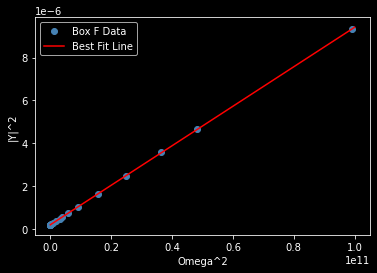

In [14]:
#black box F
R_L_F = np.array([2200,2200,2200,2200,2200,2200,2000,2000,2100,1800,1600,1400,
                1350,1000,770,460,530,630,1150,320]) #load resistance (ohms)
f_F = np.array([11.16,50.45,100.6,502,257,1093,3032,2028,260,5045,7003,9040,
              10004,15080,20010,34920,30400,25100,12110,50150]) #frequency (Hz)

A_1_F = np.array([6.4,6.38,6.40,6.38,6.36,6.34,6.66,6.6,6.52,6.82,7.0,7.2,
                7.22,7.60,8.0,8.4,8.24,8.2,7.57,8.6]) #peak to peak ch. 1 (V)
A_2_F = np.array([6.32,6.36,6.40,6.38,6.40,6.44,6.48,6.22,6.24,6.68,6.88,7.12,
                7.38,7.74,7.92,8.36,8.28,8.16,7.48,8.4]) #peak to peak ch.2 (V)
phi_deg_F = np.array([179,178,-179,-179,-179,-173,-161,-166,-179,-150,-142,-137,
                    -129,-120,-115,-108,-110,-112,-126,-105]) #phase angle (degrees)

phi_F = np.radians(phi_deg_F) #convert phi from degrees to radians
omega_F = f_F * 2*np.pi
V_1_F = A_1_F/2 
V_2_F = A_2_F/2
Z_F = abs((R_L_F*V_1_F)/V_2_F)
i=1j
Z_c_F = Z_F*np.cos(phi_F) + i*Z_F*np.sin(phi_F)
Y_F = 1/Z_F
print("Magnitude of Impedance =",Z_F)
print("Real component of Impedance =",Z_c_F.real)
print("Imaginary component of Impedance =",Z_c_F.imag)

if len(R_L_F) == len(f_F) == len(A_1_F) == len(A_2_F) == len(phi_deg_F):
    print("Measurement Number",len(R_L_F))
else:
    print("ERROR!!!")

plt.plot(omega_F**2,Y_F**2,'o',c="steelblue",label="Box F Data")
plt.xlabel("Omega^2")
plt.ylabel("|Y|^2")
A,B = np.polyfit(omega_F**2,Y_F**2,1)
X3 = np.linspace(0,1e11,100)
plt.plot(X3,A*X3 + B,c='r',label="Best Fit Line")
plt.legend()
#plt.savefig("box F linear")

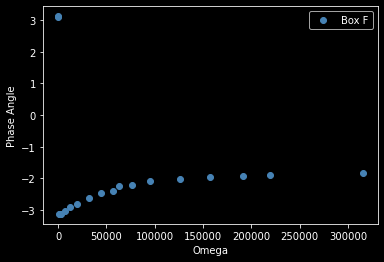

In [15]:
plt.plot(omega_F, phi_F, 'o', c="steelblue", label="Box F")
plt.xlabel("Omega")
plt.ylabel("Phase Angle")
plt.legend()
#plt.savefig("box F omega vs phi")

Standard Deviation of |Y|^2 = 1.4184508194392013e-08
Standard Deviation of |Y| = 0.00011909873296719832
Chi squared = 1.4604637732681914e-09


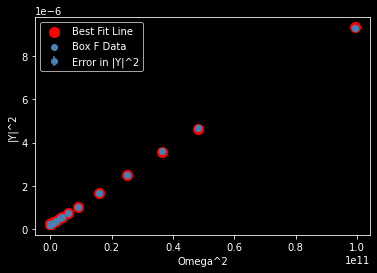

In [16]:
#Box F stats
Y_F_squared_comp = A * omega_F**2 + B
sig_Y_F = np.sqrt((np.sum((Y_F**2 - Y_F_squared_comp)**2)) / (len(Y_F_squared_comp)-1))
chi_sq_F = np.sum(((Y_F**2 - Y_F_squared_comp)**2) / Y_F_squared_comp)

plt.scatter(omega_F**2, Y_F_squared_comp, c='r', s=100, label="Best Fit Line")
plt.scatter(omega_F**2, Y_F**2, c="steelblue", label="Box F Data")
plt.xlabel("Omega^2")
plt.ylabel("|Y|^2")
plt.errorbar(omega_F**2, Y_F**2, yerr=sig_Y_F, fmt='o', c="steelblue", label="Error in |Y|^2")
print("Standard Deviation of |Y|^2 =",sig_Y_F)
print("Standard Deviation of |Y| =",np.sqrt(sig_Y_F))
print("Chi squared =",chi_sq_F)
plt.legend()
#plt.savefig("box F with error")